## 1.Подготовка 

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as sk_preprocessing
import sklearn.linear_model as sk_linear_models
import sklearn.metrics as sk_metrics
import sklearn.model_selection as sk_model_selection
import numpy as np
import seaborn as sns




Для универсальности выполнения задачи создадим функцию . 

Аргументы функции : X-независимая переменная ,y-зависимая переменная ,Max_degree-максимальная степень до которой  функция будет считать MSE, k-количество случайных разделения данных и обучений  на train и test  

In [254]:
def Search_Optimal_degree(X, y,Max_degree,k):
    MSE=[]
    for degree in range(1,Max_degree+1):
        result=[]
        l_test=[]
        l_train=[]
        for n in range(k):
            
            X_train, X_test, y_train, y_test = sk_model_selection.train_test_split(X, y, shuffle = True) #случайное разделения данных на train и test 
            polynomial_transformer = sk_preprocessing.PolynomialFeatures(degree=degree) #добавления полинома
            X_transformed_train = polynomial_transformer.fit_transform(X_train)
            model = sk_linear_models.LinearRegression()
            model.fit(X_transformed_train , y_train) #обучения линейной регрессии 
            y_train_predicted = model.predict(X_transformed_train)
            X_transformed_test=polynomial_transformer.fit_transform(X_test)
            y_test_predicted = model.predict( X_transformed_test)
            
            l_test.append(sk_metrics.mean_squared_error(y_test, y_test_predicted))
            l_train.append(sk_metrics.mean_squared_error(y_train, y_train_predicted))
        
        result.append(np.mean(l_test) )# записываем среднее MSE test случайных разделения данных и обучений
        result.append(np.mean(l_train) )# записываем среднее MSE train случайных разделения данных и обучений
        result.append(degree)
#         result.append(y_train_predicted)
#         result.append(y_test_predict)
        
        MSE.append(result)
    columns=[ 'MSE_test','MSE_train','degree']
    df_result = pd.DataFrame(MSE, columns=columns)
    return df_result
    


## 2. Работа с данными 

2.1 Возмем ранее изученые данные и проверим на  наличии связи с полиноминальном регрессией

In [255]:
df = pd.read_csv("https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/2_regression/data/advertising.csv")
X = df[["TV"]]
y = df[["sales"]]




2.2 Немного визуализации 

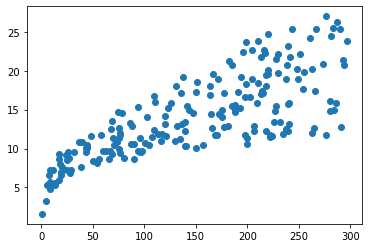

In [256]:
plt.scatter(X, y)

2.3 Построения модели и вывод данных 

In [243]:

k=10 # количество  обучений модели с случайным разделения по каждой степени 
Max_degree=10 #b максимальная степень проверки данных
df_Search =Search_Optimal_degree(X, y,Max_degree,k)
print(df_Search)

    MSE_test  MSE_train  degree
0  10.571323  10.515301       1
1  11.039971  10.193697       2
2  11.005316  10.086860       3
3  11.927585   9.805907       4
4  11.540688   9.763932       5
5  11.405572   9.785609       6
6  11.450735  10.023054       7
7  10.712651  10.459185       8
8  11.258946  10.632081       9
9  13.006648  11.040052      10


In [249]:

df_Search.iloc[df_Search['MSE_train'].argmin()] # Находим минимальный MSE_train и возврашаем MSE_train и степень

MSE_test     11.540688
MSE_train     9.763932
degree        5.000000
Name: 4, dtype: float64

2.4 Вывод : на MSE_train выделяется небольшая зависимость от степени  и минимальная ошибика на степени  "5"

## 3 Визуализация модели с полученной степнью 

<function matplotlib.pyplot.show(close=None, block=None)>

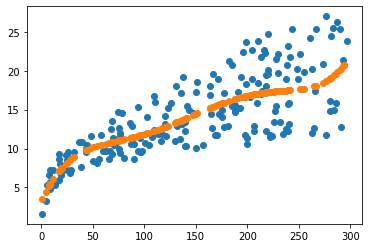

In [250]:
X_train, X_test, y_train, y_test = sk_model_selection.train_test_split(X, y, shuffle = True) #случайное разделения данных на train и test 
polynomial_transformer = sk_preprocessing.PolynomialFeatures(degree=5) #добавления полинома
X_transformed_train = polynomial_transformer.fit_transform(X_train)
model = sk_linear_models.LinearRegression()
model.fit(X_transformed_train , y_train) #обучения линейной регрессии 
y_train_predicted = model.predict(X_transformed_train)
X_transformed_test=polynomial_transformer.fit_transform(X_test)
y_test_predict = model.predict( X_transformed_test)
plt.scatter(X, y)
plt.scatter(X_train, y_train_predicted)
plt.show